In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("train_features.csv")

/tmp/ipykernel_4335/1774928193.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("train_features.csv")


In [3]:

df = df[df['label'] != -1]
print(df['label'].value_counts())


label
0    300000
1    300000
Name: count, dtype: int64


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 600000 entries, 0 to 799999
Data columns (total 49 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   Unnamed: 0                               600000 non-null  int64  
 1   sha256                                   600000 non-null  object 
 2   md5                                      600000 non-null  object 
 3   appeared                                 600000 non-null  object 
 4   label                                    600000 non-null  int64  
 5   avclass                                  289246 non-null  object 
 6   histogram                                600000 non-null  object 
 7   byteentropy                              600000 non-null  object 
 8   numstrings                               600000 non-null  int64  
 9   avlength                                 600000 non-null  float64
 10  printabledist                        

In [5]:
df.describe()

,Unnamed: 0,label,numstrings,avlength,printables,entropy,paths,urls,registry,MZ,...,optional.minor_image_version,optional.major_linker_version,optional.minor_linker_version,optional.major_operating_system_version,optional.minor_operating_system_version,optional.major_subsystem_version,optional.minor_subsystem_version,optional.sizeof_code,optional.sizeof_headers,optional.sizeof_heap_commit
count,600000.000000,600000.0,6.000000e+05,600000.000000,6.000000e+05,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,...,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,6.000000e+05,6.000000e+05,6.000000e+05
mean,392006.873433,0.5,7.192964e+03,35.066185,1.109082e+05,5.781391,2.562960,13.005785,0.467412,16.694400,...,16.479800,9.991252,7.171048,6.105308,1.115555,4.821315,0.533035,1.671038e+06,2.266599e+03,6.711603e+04
std,235131.482990,0.5,2.666313e+04,937.064784,6.346023e+05,0.664335,329.506798,98.927503,12.095834,93.779332,...,648.886672,10.498946,13.930327,274.358240,171.753319,77.693482,95.610419,5.036031e+07,3.689315e+05,8.391136e+06
min,0.000000,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,186423.750000,0.0,4.420000e+02,7.659796,5.911000e+03,5.431384,0.000000,0.000000,0.000000,1.000000,...,0.000000,6.000000,0.000000,4.000000,0.000000,4.000000,0.000000,2.099200e+04,1.024000e+03,4.096000e+03
50%,391385.500000,0.5,1.839000e+03,12.348739,2.097700e+04,5.840025,0.000000,0.000000,0.000000,4.000000,...,0.000000,8.000000,0.000000,4.000000,0.000000,4.000000,0.000000,1.029120e+05,1.024000e+03,4.096000e+03
75%,596327.250000,1.0,5.055000e+03,17.432953,6.718600e+04,6.309720,1.000000,9.000000,0.000000,11.000000,...,0.000000,12.000000,11.000000,5.000000,0.000000,5.000000,0.000000,3.768320e+05,1.024000e+03,4.096000e+03
max,799999.000000,1.0,2.487230e+06,222715.615044,5.757288e+07,6.584958,247805.000000,26103.000000,2494.000000,32523.000000,...,65535.000000,255.000000,255.000000,65535.000000,60928.000000,57860.000000,65280.000000,4.294967e+09,2.852132e+08,2.073742e+09


In [6]:
df.head()

,Unnamed: 0,sha256,md5,appeared,label,avclass,histogram,byteentropy,numstrings,avlength,...,optional.major_subsystem_version,optional.minor_subsystem_version,optional.sizeof_code,optional.sizeof_headers,optional.sizeof_heap_commit,entry,sections,imports,exports,datadirectories
0,0,0abb4fda7d5b13801d63bee53e5e256be43e141faa077a...,63956d6417f8f43357d9a8e79e52257e,2006-12,0,NaN,45521|13095|12167|12496|12429|11709|11864|1205...,0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|...,14573,5.972072,...,4,0,26624,1024,4096,.text,.txt_s_26600|.txt_e_6.53|.txt_vs_26100|.txt_CN...,KRNL32_StFlTm|KRNL32_CmprFlTm|KRNL32_SrchPth|K...,NaN,XPRT_TBL_s_0|XPRT_TBL_va_0|MPRT_TBL_s_200|MPRT...
1,1,c9cafff8a596ba8a80bafb4ba8ae6f2ef3329d95b85f15...,6f7bde7a1126debf0cc359a54953efc1,2007-01,0,NaN,93059|15789|2871|3005|4107|1771|2918|4312|4610...,47100|2|0|0|0|0|2|0|0|0|0|0|0|0|0|0|1938|63|27...,1803,11.191348,...,4,0,455680,1024,4096,.text,.txt_s_455700|.txt_e_6.82|.txt_vs_455300|.txt_...,DVP32_CnvrtStrngScrtyDscrptrTScrtyDscrptr|DVP3...,NaN,XPRT_TBL_s_0|XPRT_TBL_va_0|MPRT_TBL_s_420|MPRT...
2,2,eac8ddb4970f8af985742973d6f0e06902d42a3684d791...,7520c8f9534ca818726a4feaebf49e2b,2007-02,0,NaN,45369|2560|1233|1542|4234|515|613|1542|1841|21...,6144|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|1935|3|15|3...,1238,12.020194,...,4,0,80896,1024,4096,.text,.txt_s_81900|.txt_e_6.46|.txt_vs_80600|.txt_CN...,DVP32_RgStVlx|DVP32_RgDltKy|DVP32_RgDltVl|DVP3...,NaN,XPRT_TBL_s_0|XPRT_TBL_va_0|MPRT_TBL_s_220|MPRT...
3,3,7f513818bcc276c531af2e641c597744da807e21cc1160...,e435a536968941854bcec3b902c439f6,2007-02,0,NaN,21315|9641|9332|9358|9598|9220|9146|9382|9365|...,0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|...,11166,5.807899,...,4,0,36864,1024,4096,CODE,CD_s_36900|CD_e_6.6|CD_vs_36600|CD_CNT_CD|CD_M...,krnl32_DltCrtclSctn|krnl32_WrtFl|sr32_MssgBx|s...,NaN,XPRT_TBL_s_0|XPRT_TBL_va_0|MPRT_TBL_s_2370|MPR...
4,4,ca65e1c387a4cc9e7d8a8ce12bf1bcf9f534c9032b9d95...,e93049e2df82ab26f35ad0049173cb14,2007-02,0,NaN,23539|6015|5214|4727|4892|4649|4367|5299|5625|...,0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|3907|48|16|7|1...,5547,6.043447,...,4,0,34304,1536,4096,.text,.txt_s_34300|.txt_e_6.59|.txt_vs_33900|.txt_CN...,DVP32_RgClsKy|DVP32_llctndntlzSd|DVP32_qlSd|DV...,NaN,XPRT_TBL_s_0|XPRT_TBL_va_0|MPRT_TBL_s_140|MPRT...


In [7]:
df.isnull().sum()

Unnamed: 0                                      0
sha256                                          0
md5                                             0
appeared                                        0
label                                           0
avclass                                    310754
histogram                                       0
byteentropy                                     0
numstrings                                      0
avlength                                        0
printabledist                                   0
printables                                      0
entropy                                         0
paths                                           0
urls                                            0
registry                                        0
MZ                                              0
size                                            0
vsize                                           0
has_debug                                       0


In [8]:
df.isnull().mean()

Unnamed: 0                                 0.000000
sha256                                     0.000000
md5                                        0.000000
appeared                                   0.000000
label                                      0.000000
avclass                                    0.517923
histogram                                  0.000000
byteentropy                                0.000000
numstrings                                 0.000000
avlength                                   0.000000
printabledist                              0.000000
printables                                 0.000000
entropy                                    0.000000
paths                                      0.000000
urls                                       0.000000
registry                                   0.000000
MZ                                         0.000000
size                                       0.000000
vsize                                      0.000000
has_debug   

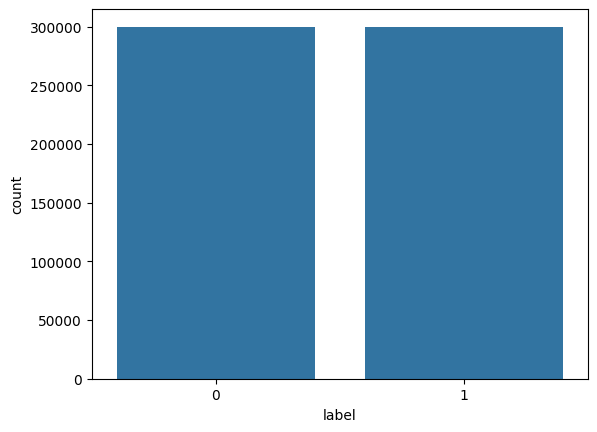

label
0    300000
1    300000
Name: count, dtype: int64

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='label', data=df)
plt.show()

df['label'].value_counts()

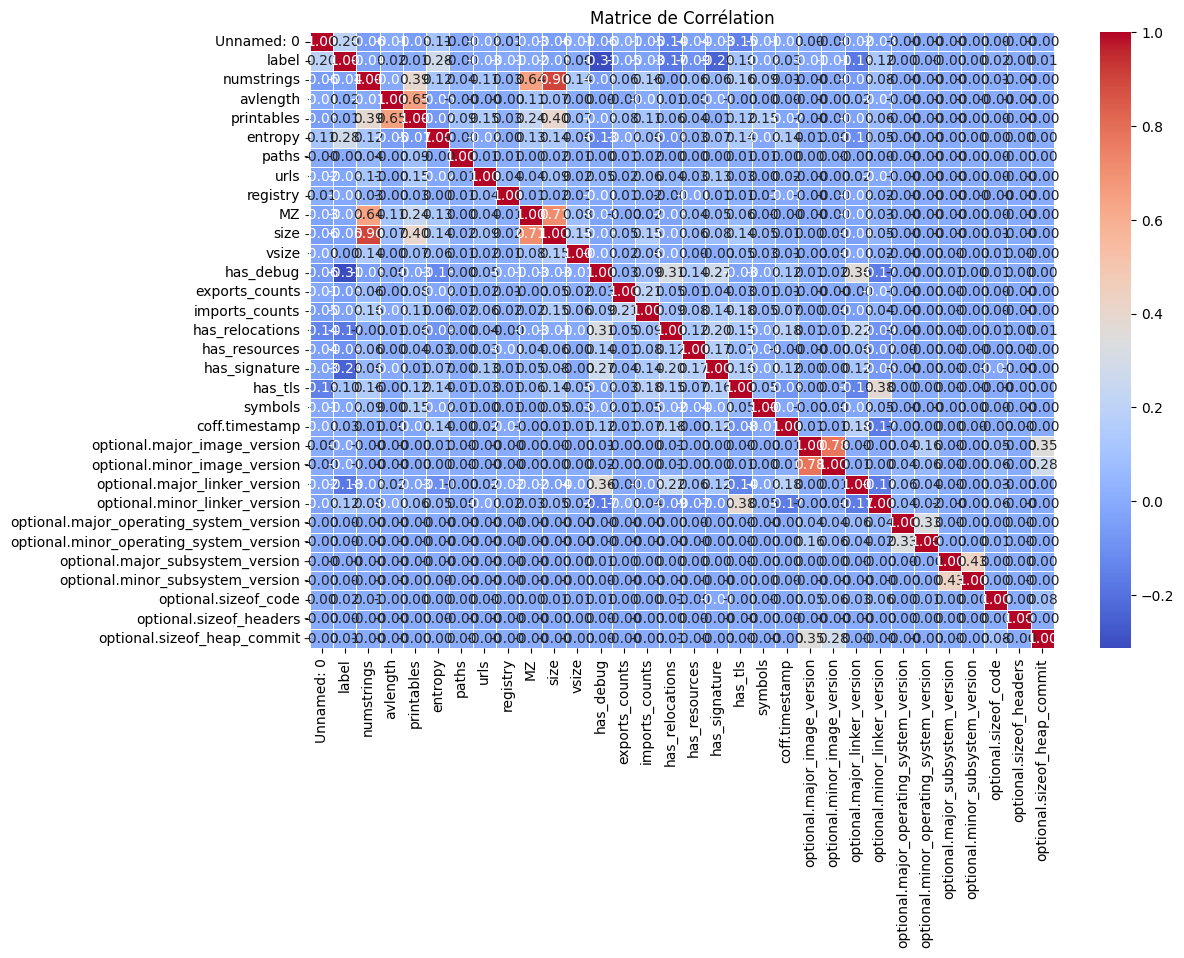

In [10]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Matrice de Corrélation")
plt.show()

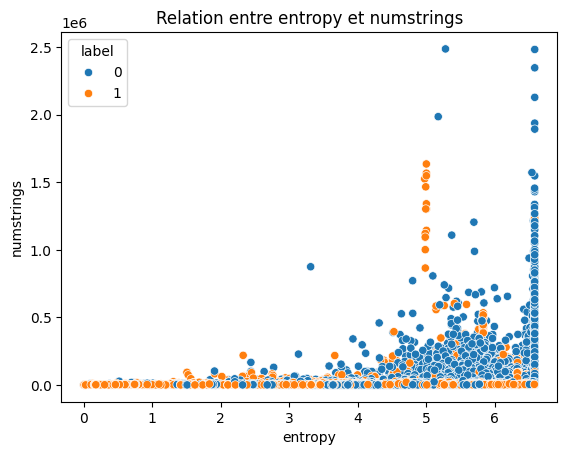

In [11]:
sns.scatterplot(x='entropy', y='numstrings', data=df, hue='label')
plt.title('Relation entre entropy et numstrings')
plt.show()

In [12]:
df['numstrings'] = pd.to_numeric(df['numstrings'], downcast='integer')
df['avlength'] = pd.to_numeric(df['avlength'], downcast='float')
df['printables'] = df['printables'].astype('category')
df['entropy'] = pd.to_numeric(df['entropy'], downcast='float')

In [13]:
df['histogram'] = df['histogram'].apply(lambda x: list(map(int, x.split('|'))))
df['byteentropy'] = df['byteentropy'].apply(lambda x: list(map(float, x.split('|'))))

hist_array = np.array(df['histogram'].tolist())
entropy_array = np.array(df['byteentropy'].tolist())

for i in range(hist_array.shape[1]):
    df[f'hist_{i}'] = hist_array[:, i]

for i in range(entropy_array.shape[1]):
    df[f'entropy_{i}'] = entropy_array[:, i]

df.drop(columns=['histogram', 'byteentropy'], inplace=True)
columns_to_drop = ['sha256', 'md5', 'Unnamed: 0', 'appeared', 'coff.characteristics', 'sections', 'imports', 'datadirectories']

df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])


/tmp/ipykernel_4335/3744645024.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'hist_{i}'] = hist_array[:, i]
/tmp/ipykernel_4335/3744645024.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'hist_{i}'] = hist_array[:, i]
/tmp/ipykernel_4335/3744645024.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

In [14]:
df.head()

,label,avclass,numstrings,avlength,printabledist,printables,entropy,paths,urls,registry,...,entropy_246,entropy_247,entropy_248,entropy_249,entropy_250,entropy_251,entropy_252,entropy_253,entropy_254,entropy_255
0,0,NaN,14573,5.972072,1046|817|877|803|738|909|831|842|871|763|796|7...,87031,6.569898,3,0,0,...,372830.0,375415.0,371989.0,372095.0,371755.0,373615.0,372116.0,373375.0,373929.0,375883.0
1,0,NaN,1803,11.191348,231|31|81|57|72|75|51|45|65|51|44|58|67|61|112...,20178,5.797295,0,0,0,...,13919.0,12997.0,15116.0,14402.0,11916.0,12165.0,12835.0,11881.0,13610.0,18303.0
2,0,NaN,1238,12.020194,51|22|64|15|32|16|12|31|33|12|13|247|26|20|57|...,14881,5.744186,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,NaN,11166,5.807899,927|609|688|628|693|623|610|639|606|594|668|62...,64851,6.578020,0,0,0,...,292123.0,291021.0,290256.0,289423.0,290909.0,291632.0,289626.0,289780.0,291842.0,291189.0
4,0,NaN,5547,6.043447,323|332|311|307|304|364|286|296|291|314|258|29...,33523,6.561550,0,0,0,...,136303.0,136028.0,135806.0,136048.0,137166.0,135946.0,136392.0,135605.0,136067.0,136331.0


In [15]:
len(df)

600000

In [16]:
entropy_cols = [f'entropy_{i}' for i in range(256)]  
scaler = StandardScaler()
df[entropy_cols] = scaler.fit_transform(df[entropy_cols])

In [17]:
df_sampled = df.sample(frac=0.1, random_state=42) 

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


In [19]:
print(df['label'].value_counts())


label
0    300000
1    300000
Name: count, dtype: int64


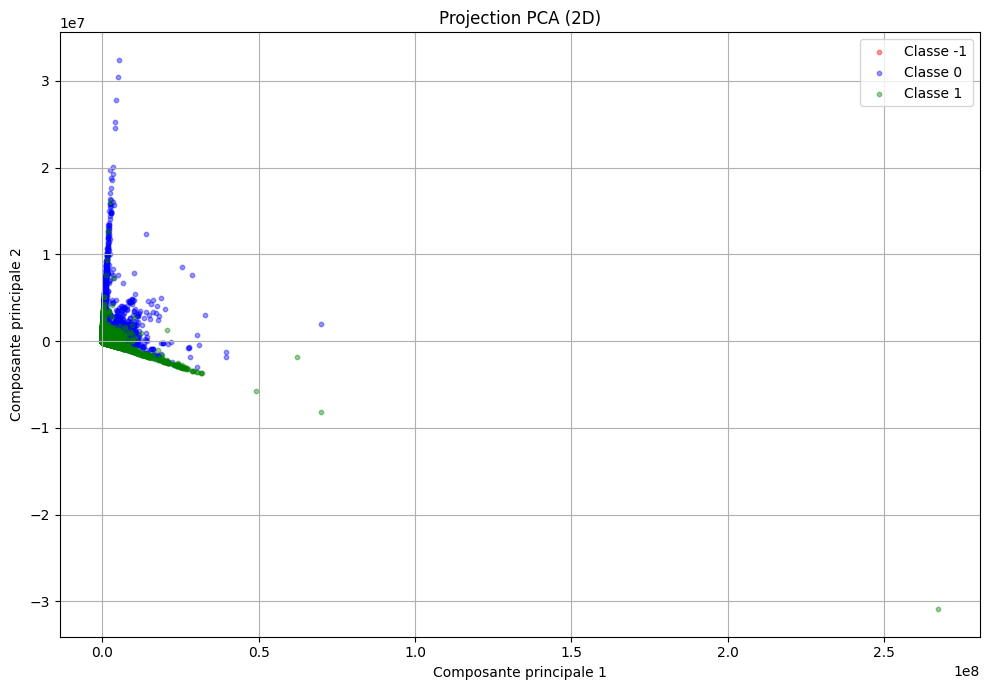

In [20]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

features = [col for col in df.columns if col.startswith('entropy_') or col.startswith('hist_')]

X = df[features]
y = df['label']

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 7))
plt.scatter(X_pca[y == -1, 0], X_pca[y == -1, 1], c='red', label='Classe -1', alpha=0.4, s=10)
plt.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], c='blue', label='Classe 0', alpha=0.4, s=10)
plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], c='green', label='Classe 1', alpha=0.4, s=10)
plt.title("Projection PCA (2D)")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


/home/ubuntu-sddl-01/Desktop/C++ learning/venv/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


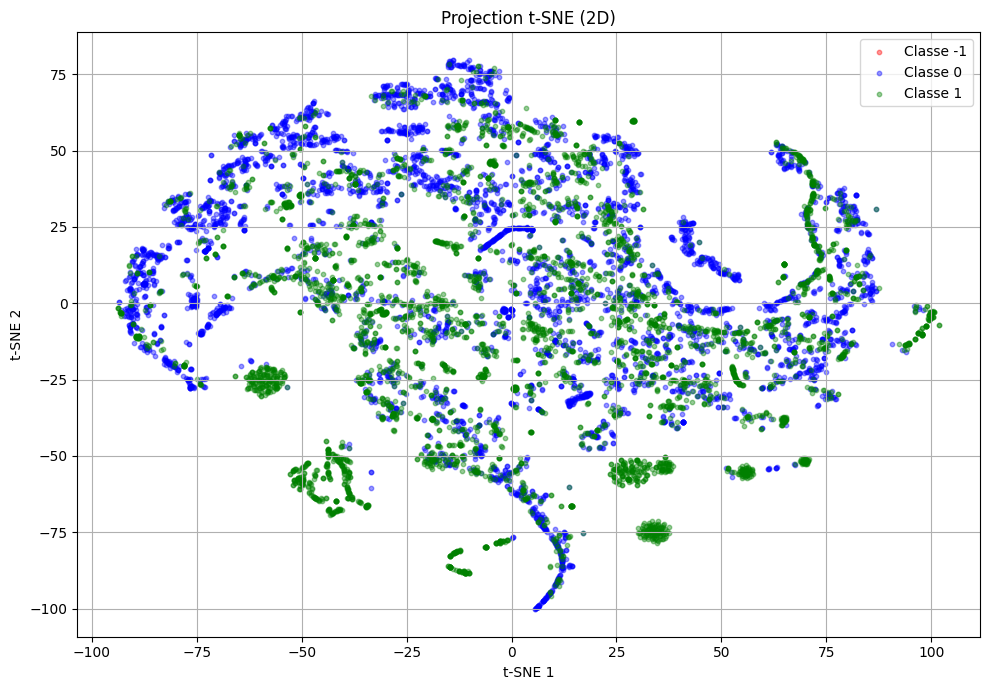

In [21]:
from sklearn.manifold import TSNE

sampled_df = df.sample(n=10000, random_state=42)
X = sampled_df[features]
y = sampled_df['label']

tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(10, 7))
plt.scatter(X_tsne[y == -1, 0], X_tsne[y == -1, 1], c='red', label='Classe -1', alpha=0.4, s=10)
plt.scatter(X_tsne[y == 0, 0], X_tsne[y == 0, 1], c='blue', label='Classe 0', alpha=0.4, s=10)
plt.scatter(X_tsne[y == 1, 0], X_tsne[y == 1, 1], c='green', label='Classe 1', alpha=0.4, s=10)
plt.title("Projection t-SNE (2D)")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [22]:
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd

X = df_sampled[entropy_cols]
y = df_sampled['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
model.fit(X_train_scaled, y_train_enc)

y_pred_enc = model.predict(X_test_scaled)
y_pred = le.inverse_transform(y_pred_enc)

print(classification_report(y_test, y_pred))


/home/ubuntu-sddl-01/Desktop/C++ learning/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [09:37:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.90      0.91      0.91      6033
           1       0.91      0.90      0.90      5967

    accuracy                           0.90     12000
   macro avg       0.90      0.90      0.90     12000
weighted avg       0.90      0.90      0.90     12000



In [ ]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

print(f" {indices[:10]}")

for i in range(10):
    print(f"Feature {entropy_cols[indices[i]]} : {importances[indices[i]]}")


Top 10 des caractéristiques importantes : [255 128   4 249 254  78 251   0  19 226]
Feature entropy_255 : 0.12334296107292175
Feature entropy_128 : 0.02721989154815674
Feature entropy_4 : 0.021718110889196396
Feature entropy_249 : 0.020714078098535538
Feature entropy_254 : 0.019586723297834396
Feature entropy_78 : 0.017360487952828407
Feature entropy_251 : 0.01592584140598774
Feature entropy_0 : 0.012157892808318138
Feature entropy_19 : 0.011625800281763077
Feature entropy_226 : 0.011274858377873898


In [31]:
from sklearn.metrics import f1_score


def objective(trial):
    params = {
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "n_estimators": trial.suggest_int("n_estimators", 100, 1000),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "gamma": trial.suggest_float("gamma", 0, 5),
        "reg_alpha": trial.suggest_float("reg_alpha", 0, 1),
        "reg_lambda": trial.suggest_float("reg_lambda", 0, 1),
        "random_state": 42,
        "use_label_encoder": False,
        "eval_metric": "mlogloss" }

    model = XGBClassifier(**params)
    model.fit(X_train, y_train)

    preds = model.predict(X_test)
    f1 = f1_score(y_test, preds, average='weighted')
    return f1

In [ ]:
import optuna
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

X = df_sampled[entropy_cols]
y = df_sampled['label']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

le = LabelEncoder()
y_encoded = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42)

In [ ]:

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)

print(study.best_params)

[I 2025-05-07 09:56:17,147] A new study created in memory with name: no-name-35f8865a-7916-422b-bd93-a5c925fa5ebc
/home/ubuntu-sddl-01/Desktop/C++ learning/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [09:56:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
[I 2025-05-07 09:56:23,181] Trial 0 finished with value: 0.9031510214557708 and parameters: {'max_depth': 12, 'learning_rate': 0.173952241449739, 'n_estimators': 333, 'subsample': 0.5281158609503487, 'colsample_bytree': 0.5664200677728262, 'gamma': 4.083068139925703, 'reg_alpha': 0.3090067912460086, 'reg_lambda': 0.9339424115457046}. Best is trial 0 with value: 0.9031510214557708.
/home/ubuntu-sddl-01/Desktop/C++ learning/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [09:56:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, ite

In [28]:
model = XGBClassifier(**study.best_params, use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train, y_train)
model.save_model('best_model.xgb')
y_pred = model.predict(X_test)

/home/ubuntu-sddl-01/Desktop/C++ learning/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [09:54:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/ubuntu-sddl-01/Desktop/C++ learning/venv/lib/python3.12/site-packages/xgboost/sklearn.py:1028: UserWarning: [09:55:13] WARNING: /workspace/src/c_api/c_api.cc:1427: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  self.get_booster().save_model(fname)


In [29]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.91      0.93      0.92      9032
           1       0.93      0.91      0.92      8968

    accuracy                           0.92     18000
   macro avg       0.92      0.92      0.92     18000
weighted avg       0.92      0.92      0.92     18000

